In [1]:
# script to plot vertical profiles of some TOGA tracers
# include plain scatter, boxplots per KM, and sampling distribution 
# author: sofia chelpon
# created: Feb 11, 2020 

In [92]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [93]:
toga_trc = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_ratios/toga_data_df_twp.pkl')
toga_trc_06 = toga_trc[toga_trc['Flight'] == 'RF06']
toga_trc_06_n = toga_trc_06[toga_trc_06['GGLAT'] > 15]
toga_trc_06_s = toga_trc_06[toga_trc_06['GGLAT'] < 15]

In [94]:
# put desired toga data into a dataframe for easier chunking 
alt_bins = np.arange(0,17,1)
alt_bin_labels = np.arange(0.5, 16.5, 1)

toga_df_n = pd.DataFrame({"GGALT [km]": toga_trc_06_n['GGALT']/1000})
toga_df_n['alt_bins'] = pd.cut(toga_df_n['GGALT [km]'], bins=alt_bins, labels=alt_bin_labels)

# add all tracers back in 
for ii in toga_trc_06_n:
    toga_df_n[str(ii)] = toga_trc[ii]
toga_df_n = toga_df_n.drop(columns = 'Time_UTC').drop(columns = 'Notes') \
    .drop(columns = 'Intrument').drop(columns = 'GGLAT').drop(columns = 'GGLON') \
    .drop(columns = 'WIC').drop(columns = 'GGALT').drop(columns = 'Flight')
toga_df_n

,GGALT [km],alt_bins,Acetaldehyde,n_Butane,i_Butane,Benzene,C3H8,Methanol,Bromoform,Tetrachloroethylene,Dibromomethane,Dichloromethane,Chloroform,Carbon_Tetrachloride
620,8.843168,8.5,NaN,1.73,1.51,5.050000,39.0,44.0,0.050,0.15,1.019,41.389999,7.85,95.099998
621,9.453370,9.5,2.500000,2.81,2.56,4.510000,28.0,25.0,0.050,0.15,0.969,41.730000,8.19,95.099998
622,9.984510,9.5,33.500000,2.07,2.89,9.360000,45.0,181.0,0.294,0.15,0.963,45.410000,8.83,95.500000
623,10.840633,10.5,57.599998,10.85,7.76,19.400000,87.0,259.0,0.708,0.15,1.281,51.970001,10.68,94.699997
624,11.458446,11.5,32.900002,9.94,8.71,17.709999,66.0,173.0,0.454,0.15,1.098,52.889999,10.82,96.800003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,14.941235,14.5,NaN,7.38,4.10,3.030000,57.0,10.0,0.050,0.15,1.300,39.740002,8.64,92.199997
753,14.998698,14.5,29.500000,5.37,4.08,3.230000,64.0,10.0,0.050,0.15,0.961,40.619999,8.23,87.800003
754,15.000775,15.5,NaN,3.04,2.33,0.500000,55.0,10.0,0.050,0.15,0.744,39.209999,8.38,92.400002
755,14.998397,14.5,2.500000,0.25,0.25,0.500000,58.0,10.0,0.050,0.15,1.100,40.340000,7.55,89.699997


In [95]:
# put desired toga data into a dataframe for easier chunking 
alt_bins = np.arange(0,17,1)
alt_bin_labels = np.arange(0.5, 16.5, 1)

toga_df_s = pd.DataFrame({"GGALT [km]": toga_trc_06_s['GGALT']/1000})
toga_df_s['alt_bins'] = pd.cut(toga_df_s['GGALT [km]'], bins=alt_bins, labels=alt_bin_labels)

# add all tracers back in 
for ii in toga_trc_06_s:
    toga_df_s[str(ii)] = toga_trc[ii]
toga_df_s = toga_df_s.drop(columns = 'Time_UTC').drop(columns = 'Notes') \
    .drop(columns = 'Intrument').drop(columns = 'GGLAT').drop(columns = 'GGLON') \
    .drop(columns = 'WIC').drop(columns = 'GGALT').drop(columns = 'Flight')
toga_df_s

,GGALT [km],alt_bins,Acetaldehyde,n_Butane,i_Butane,Benzene,C3H8,Methanol,Bromoform,Tetrachloroethylene,Dibromomethane,Dichloromethane,Chloroform,Carbon_Tetrachloride
613,1.599463,1.5,326.799988,16.120001,11.24,NaN,71.0,NaN,1.262,NaN,NaN,53.099998,12.99,98.400002
614,3.315720,3.5,133.899994,11.110000,8.61,NaN,55.0,NaN,1.198,0.15,NaN,52.400002,13.43,99.599998
615,4.279591,4.5,120.400002,12.870000,8.26,25.770000,63.0,NaN,1.009,0.15,NaN,55.150002,12.40,97.500000
616,5.401236,5.5,54.400002,2.600000,2.67,9.150000,5.0,NaN,0.922,0.15,1.224,36.330002,8.60,97.900002
617,6.401952,6.5,19.400000,0.250000,0.25,5.140000,5.0,256.0,0.699,0.15,0.973,31.719999,7.08,94.599998
618,7.361858,7.5,2.500000,1.830000,2.86,6.700000,5.0,112.0,0.266,0.15,0.955,37.720001,7.45,96.199997
619,8.222585,8.5,2.500000,4.270000,3.10,7.090000,52.0,65.0,0.285,0.15,1.082,43.130001,8.51,97.699997
757,14.937937,14.5,NaN,4.230000,3.49,3.730000,68.0,51.0,0.050,0.86,0.992,44.389999,9.08,86.400002
758,12.867437,12.5,2.500000,25.459999,15.85,24.590000,128.0,NaN,0.789,1.56,1.271,59.689999,12.04,89.599998
759,10.737831,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# get some colors
color_awas = [0.05, 0.09, 0.66]

myreds = matplotlib.cm.get_cmap('Reds')

color_toga = myreds(0.55)
color_toga = color_toga[0:3]

In [97]:
alt_bin_labels

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5])

In [127]:
##### ----------------------------- make my axes to fill 
def plot_vertprof(trc):
    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(toga_df_s[trc], toga_df_s['GGALT [km]'], 
                     edgecolor = 'r', facecolor = 'r', alpha = 0.5, label = 'South') 
    ax.scatter(toga_df_n[trc], toga_df_n['GGALT [km]'], 
                     edgecolor = 'b',  facecolor = 'b', alpha = 0.5, label = 'North') 
    ax.set_ylim([0, 16])
    ax.grid(which = 'major')
    ax.set_title(trc)
    ax.legend()
    ax.set_xlabel('Mixing Ratio [pptv]')
    ax.set_ylabel('Altitude [km]')

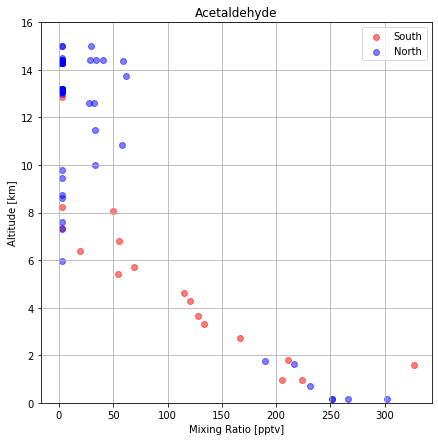

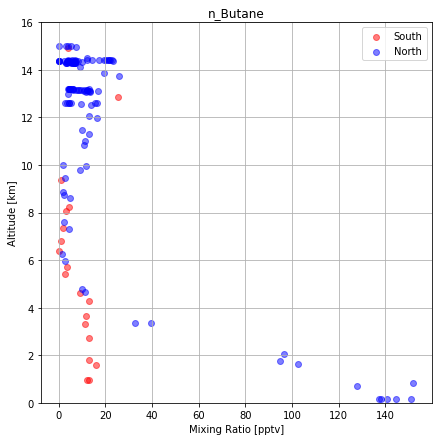

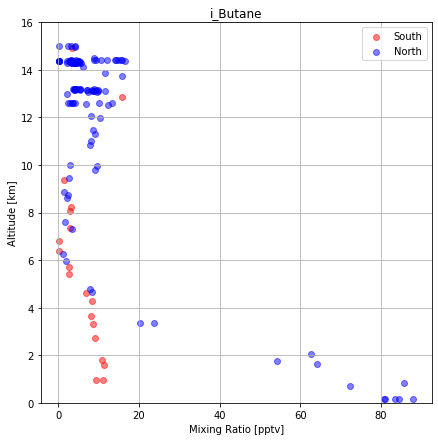

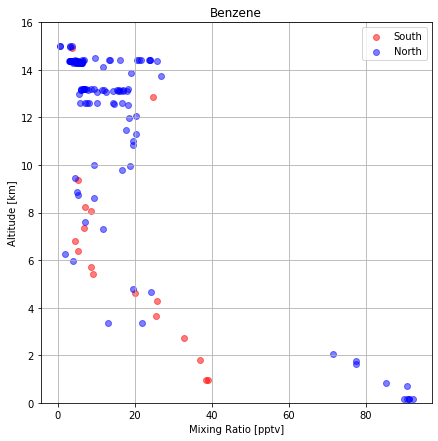

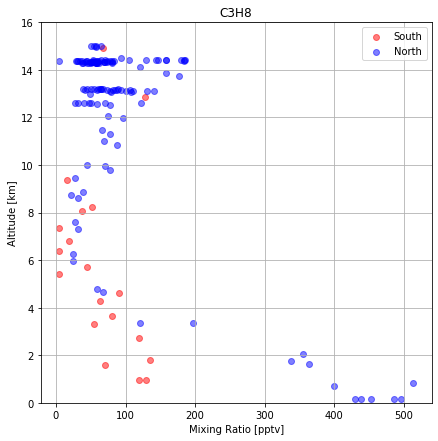

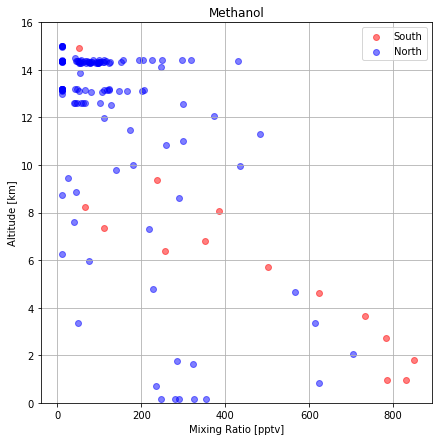

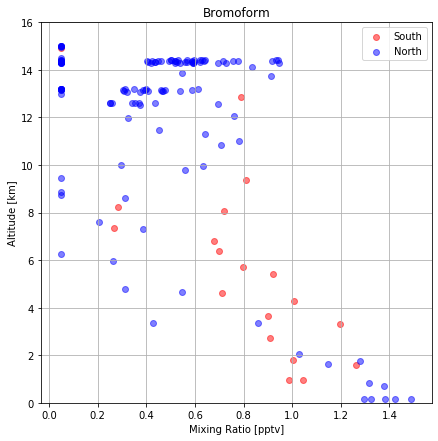

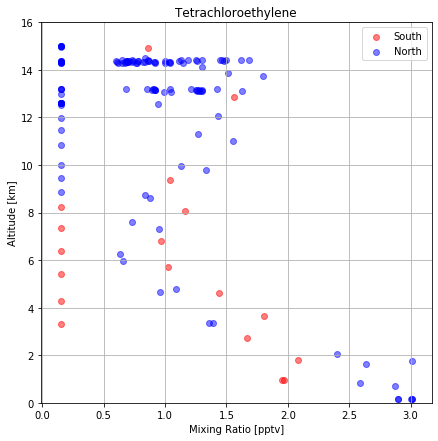

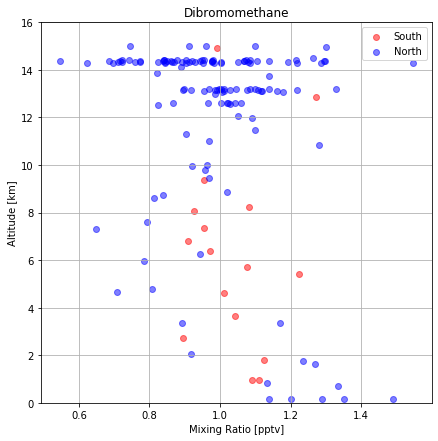

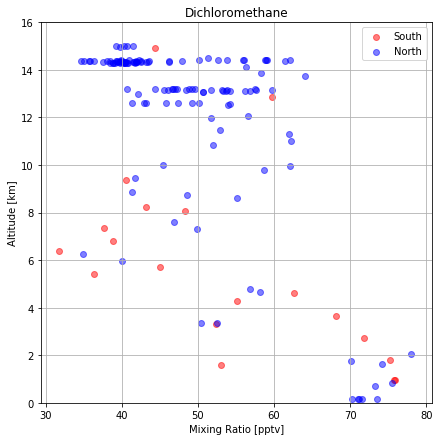

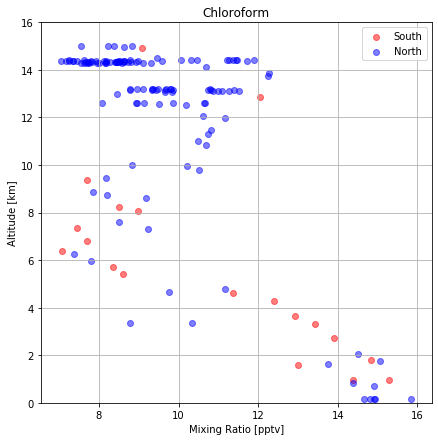

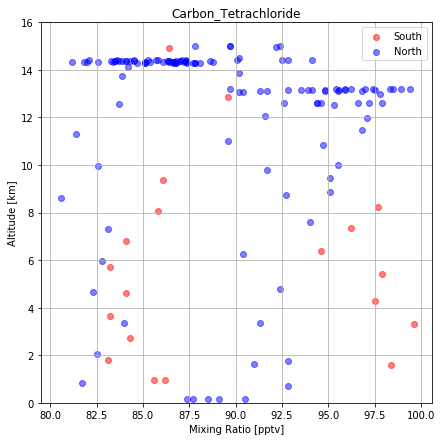

In [136]:
trc = 'Acetaldehyde'
plot_vertprof(trc)

trc = 'n_Butane'
plot_vertprof(trc)

trc = 'i_Butane'
plot_vertprof(trc)

trc = 'Benzene'
plot_vertprof(trc)

trc = 'C3H8'
plot_vertprof(trc)

trc = 'Methanol'
plot_vertprof(trc)

trc = 'Bromoform'
plot_vertprof(trc)

trc = 'Tetrachloroethylene'
plot_vertprof(trc)

trc = 'Dibromomethane'
plot_vertprof(trc)

trc = 'Dichloromethane'
plot_vertprof(trc)

trc = 'Chloroform'
plot_vertprof(trc)

trc = 'Carbon_Tetrachloride'
plot_vertprof(trc)

In [135]:
toga_trc

,Time_UTC,Flight,Notes,Intrument,GGALT,GGLAT,GGLON,WIC,Acetaldehyde,n_Butane,i_Butane,Benzene,C3H8,Methanol,Bromoform,Tetrachloroethylene,Dibromomethane,Dichloromethane,Chloroform,Carbon_Tetrachloride
0,2014-01-17 00:18:06,RF03,"Domain survey, 1 - Guam to SE (Chuuk)",TOGA,3127.166016,13.379817,144.993500,0.158994,191.199997,1.51,2.49,NaN,41.0,611.0,0.689,0.15,NaN,44.490002,9.39,97.099998
1,2014-01-17 00:20:06,RF03,"Domain survey, 1 - Guam to SE (Chuuk)",TOGA,4212.603027,13.258845,145.136200,-0.413732,126.800003,1.68,2.60,NaN,13.0,378.0,0.480,0.15,NaN,50.110001,10.29,94.300003
2,2014-01-17 00:22:06,RF03,"Domain survey, 1 - Guam to SE (Chuuk)",TOGA,5284.313477,13.121677,145.297684,-0.179464,NaN,1.42,2.17,7.28,18.0,228.0,0.050,0.15,NaN,42.029999,8.67,96.699997
3,2014-01-17 00:24:06,RF03,"Domain survey, 1 - Guam to SE (Chuuk)",TOGA,6472.384277,12.977636,145.466934,0.185521,116.900002,1.14,1.09,8.23,5.0,327.0,0.625,0.15,1.043,43.689999,9.42,94.599998
4,2014-01-17 00:26:06,RF03,"Domain survey, 1 - Guam to SE (Chuuk)",TOGA,7449.240723,12.823807,145.647217,0.411464,NaN,3.01,2.26,5.28,22.0,10.0,0.050,0.15,1.001,49.049999,9.29,93.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2014-02-22 09:12:05,RF14,"Equator crossing, SH TTL survey, and Manus ozo...",TOGA,8183.332031,11.962345,144.874908,0.239725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2170,2014-02-22 09:14:05,RF14,"Equator crossing, SH TTL survey, and Manus ozo...",TOGA,6867.007812,12.175047,144.833237,1.117823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,2014-02-22 09:16:05,RF14,"Equator crossing, SH TTL survey, and Manus ozo...",TOGA,5622.709473,12.366999,144.795425,-0.054234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2172,2014-02-22 09:18:05,RF14,"Equator crossing, SH TTL survey, and Manus ozo...",TOGA,4391.696777,12.543944,144.760483,0.015753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
